# **AC \#1**: Inteligência Artificial
Facens - Sorocaba

Prof. Adson Nogueira Alves

E-mail adson.alves@facens.br



In [1]:
# TODO: RA & Name
print('200032: ' + 'Natanael Filipe Garcia Vitorino')

200032: Natanael Filipe Garcia Vitorino


## Objetivo: Prever as taxas de mortalidade por câncer para os condados dos EUA.

Explore alternativas de **regressão linear** e desenvolva o melhor modelo possível para os problemas, evitando o overfitting. Em particular, preveja a **TARGET_deathRate** a partir de seus atributos.

## Conjunto de Dados

Esses dados foram agregados de várias fontes, incluindo o American Community Survey (census.gov), clinicaltrials.gov e cancer.gov.

O conjunto de dados contém a taxa de mortalidade e os atributos de 3.047 condados.

Informações do Conjunto de Dados: Você deve respeitar a seguinte divisão treino/teste: 2042 exemplos de treino e 305 exemplos de teste.

Existem 33 atributos, conforme segue:

Dicionário de Dados

1: avgAnnCount: Número médio de casos reportados de câncer diagnosticados anualmente (a)

2: avgDeathsPerYear: Número médio de mortes reportadas devido ao câncer (a)

3: incidenceRate: Taxa média de diagnósticos de câncer per capita (100.000) (a)

4: medianIncome: Renda média por condado (b)

5: popEst2015: População do condado (b)

6: povertyPercent: Percentual da população em situação de pobreza (b)

7: studyPerCap: Número per capita de ensaios clínicos relacionados ao câncer por condado (a)

8: binnedInc: Renda média per capita agrupada por decil (b)

9: MedianAge: Idade média dos residentes do condado (b)

10: MedianAgeMale: Idade média dos residentes masculinos do condado (b)

11: MedianAgeFemale: Idade média dos residentes femininos do condado (b)

12: Geography: Nome do condado (b)

13: AvgHouseholdSize: Tamanho médio dos lares no condado (b)

14: PercentMarried: Percentual de residentes do condado casados (b)

15: PctNoHS18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o ensino médio ou menos (b)

16: PctHS18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o diploma de ensino médio (b)

17: PctSomeCol18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram algum nível de educação universitária (b)

18: PctBachDeg18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o diploma de bacharel (b)

19: PctHS25_Over: Percentual de residentes do condado com idades acima de 25 anos que atingiram o diploma de ensino médio (b)

20: PctBachDeg25_Over: Percentual de residentes do condado com idades acima de 25 anos que atingiram o diploma de bacharel (b)

21: PctEmployed16_Over: Percentual de residentes do condado com idades acima de 16 anos empregados (b)

22: PctUnemployed16_Over: Percentual de residentes do condado com idades acima de 16 anos desempregados (b)

23: PctPrivateCoverage: Percentual de residentes do condado com cobertura de saúde privada (b)

24: PctPrivateCoverageAlone: Percentual de residentes do condado com cobertura de saúde privada apenas (sem assistência pública) (b)

25: PctEmpPrivCoverage: Percentual de residentes do condado com cobertura de saúde privada fornecida por empregador (b)

26: PctPublicCoverage: Percentual de residentes do condado com cobertura de saúde pública (b)

27: PctPubliceCoverageAlone: Percentual de residentes do condado com cobertura de saúde pública apenas (b)

28: PctWhite: Percentual de residentes do condado que se identificam como brancos (b)

29: PctBlack: Percentual de residentes do condado que se identificam como negros (b)

30: PctAsian: Percentual de residentes do condado que se identificam como asiáticos (b)

31: PctOtherRace: Percentual de residentes do condado que se identificam como pertencentes a outras etnias que não brancos, negros ou asiáticos (b)

32: PctMarriedHouseholds: Percentual de lares casados (b)

33: BirthRate: Número de nascimentos vivos relativo ao número de mulheres no condado (b)

TARGET_deathRate: Variável dependente. Taxa média de mortalidade por câncer per capita (100.000) (a)

(a): anos de 2010 a 2016

(b): Estimativas do Censo de 2013

Os dados estão disponíveis em:

treino: https://docs.google.com/spreadsheets/d/1mglppL3qIhx5Osp2wsoENN3HPnGpzkcaFpw7i9nsTvQ/edit?usp=sharing

teste: https://docs.google.com/spreadsheets/d/1AuNcBH2c7hDEE1WScZIcbiH16fTr66C19S29d5uGnfo/edit?usp=sharing

## Atividades

1. (5 pontos) Realize a Regressão Linear. Você deve implementar alguma solução e compará-la com o sklearn.linear_model.SGDRegressor (modelo linear ajustado minimizando uma perda empírica regularizada com SGD, http://scikit-learn.org).

**Nota: Alguns fatores a considerar: Existem outliers? Há valores faltantes? Como você lidará com variáveis categóricas?**

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

### Load Dataset

In [ ]:
cancer_to_train_df = pd.read_csv("../data/train/data-train.csv")

### EDA

#### Entendendo o dataset

In [3]:
cancer_to_train_df.head()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
0,170.0,76,456.6,40012,27451,16.1,0.000000,"(37413.8, 40362.7]",43.2,42.1,...,41.6,39.4,23.3,94.815349,3.145379,0.299045,0.169339,42.973813,7.391231,198.4
1,232.0,84,480.5,54441,43011,11.4,0.000000,"(51046.4, 54545.6]",38.2,37.1,...,49.4,33.6,15.6,91.939506,1.547317,1.242048,2.395544,55.221780,6.572521,170.9
2,652.0,325,371.0,57719,149568,10.4,608.418913,"(54545.6, 61494.5]",41.7,41.0,...,55.4,31.1,14.0,94.608338,2.322582,0.616874,0.607567,54.451388,6.102217,182.8
3,44.0,20,472.2,42624,6561,14.1,0.000000,"(40362.7, 42724.4]",44.8,43.3,...,48.2,34.3,16.5,94.220955,5.028520,0.000000,0.000000,53.596021,5.213270,220.5
4,581.0,230,467.1,46849,97631,16.6,0.000000,"(45201, 48021.6]",42.0,41.5,...,45.4,39.9,20.7,94.978969,1.566918,1.529418,0.334465,46.999367,6.856742,178.7


In [4]:
cancer_to_train_df.describe()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
count,2742.000000,2742.000000,2742.000000,2742.000000,2.742000e+03,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,...,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000
mean,615.856989,187.976659,448.119963,46988.582057,1.033009e+05,16.900109,160.281290,45.454996,39.588986,42.182677,...,41.102954,36.328483,19.285266,141.982602,9.394694,1.239634,2.026429,92.102617,13.644176,178.647301
std,1433.570609,510.943653,54.440848,12152.299253,3.325129e+05,6.406914,547.979242,46.057255,5.201666,5.277583,...,9.407186,7.846370,6.105076,2209.473029,19.305272,2.534925,3.619381,1514.326555,247.083035,27.738109
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,...,13.500000,11.800000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.700000
25%,76.000000,28.000000,420.425000,38750.500000,1.166025e+04,12.200000,0.000000,37.800000,36.400000,39.100000,...,34.300000,31.100000,15.000000,77.341176,0.634163,0.256324,0.296088,47.729903,4.527412,161.400000
50%,173.000000,61.000000,453.549422,45080.000000,2.671000e+04,15.900000,0.000000,41.000000,39.550000,42.400000,...,41.100000,36.400000,18.800000,89.977678,2.334870,0.544608,0.833393,51.658791,5.382090,178.300000
75%,532.750000,151.000000,480.800000,52386.500000,6.952450e+04,20.400000,87.228018,44.100000,42.600000,45.400000,...,47.400000,41.600000,23.100000,95.409287,10.746240,1.225619,2.219736,55.387885,6.529063,195.100000
max,38150.000000,14010.000000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,...,70.700000,65.100000,46.600000,97625.000000,675.000000,42.619425,41.930251,57275.000000,9375.000000,362.800000


In [5]:
cancer_to_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742 entries, 0 to 2741
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              2742 non-null   float64
 1   avgdeathsperyear         2742 non-null   int64  
 2   incidencerate            2742 non-null   float64
 3   medincome                2742 non-null   int64  
 4   popest2015               2742 non-null   int64  
 5   povertypercent           2742 non-null   float64
 6   studypercap              2742 non-null   float64
 7   binnedinc                2742 non-null   object 
 8   medianage                2742 non-null   float64
 9   medianagemale            2742 non-null   float64
 10  medianagefemale          2742 non-null   float64
 11  geography                2742 non-null   object 
 12  avghouseholdsize         2742 non-null   float64
 13  percentmarried           2742 non-null   float64
 14  pctnohs18_24            

In [6]:
cancer_to_train_df.describe()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
count,2742.000000,2742.000000,2742.000000,2742.000000,2.742000e+03,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,...,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000
mean,615.856989,187.976659,448.119963,46988.582057,1.033009e+05,16.900109,160.281290,45.454996,39.588986,42.182677,...,41.102954,36.328483,19.285266,141.982602,9.394694,1.239634,2.026429,92.102617,13.644176,178.647301
std,1433.570609,510.943653,54.440848,12152.299253,3.325129e+05,6.406914,547.979242,46.057255,5.201666,5.277583,...,9.407186,7.846370,6.105076,2209.473029,19.305272,2.534925,3.619381,1514.326555,247.083035,27.738109
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,...,13.500000,11.800000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.700000
25%,76.000000,28.000000,420.425000,38750.500000,1.166025e+04,12.200000,0.000000,37.800000,36.400000,39.100000,...,34.300000,31.100000,15.000000,77.341176,0.634163,0.256324,0.296088,47.729903,4.527412,161.400000
50%,173.000000,61.000000,453.549422,45080.000000,2.671000e+04,15.900000,0.000000,41.000000,39.550000,42.400000,...,41.100000,36.400000,18.800000,89.977678,2.334870,0.544608,0.833393,51.658791,5.382090,178.300000
75%,532.750000,151.000000,480.800000,52386.500000,6.952450e+04,20.400000,87.228018,44.100000,42.600000,45.400000,...,47.400000,41.600000,23.100000,95.409287,10.746240,1.225619,2.219736,55.387885,6.529063,195.100000
max,38150.000000,14010.000000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,...,70.700000,65.100000,46.600000,97625.000000,675.000000,42.619425,41.930251,57275.000000,9375.000000,362.800000


In [7]:
cancer_to_train_df.shape[0]

2742

#### Extraindo insights sobre o dataset

In [8]:
def df_summary(cancer_to_train_df):
    summary_data = []

    for col in cancer_to_train_df.columns:
        col_dtype = cancer_to_train_df[col].dtype
        num_of_nulls = cancer_to_train_df[col].isnull().sum()
        num_of_non_null = cancer_to_train_df[col].notnull().sum()
        num_of_distinct_values = cancer_to_train_df[col].nunique()
        percentage_of_nulls = (num_of_nulls/cancer_to_train_df.shape[0]) * 100
        percentage_of_nulls = f'{round(percentage_of_nulls, 4)}%'

        if num_of_distinct_values <= 10:
            distinct_values_counts = cancer_to_train_df[col].value_counts().to_dict()
        else:
            top_10_values_counts =cancer_to_train_df[col].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key = lambda item: item[1], reverse = True)}


        summary_data.append({
            'col_name': col,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_null': num_of_non_null,
            'percentage_of_nulls':  percentage_of_nulls,
            'distinct_values_counts': distinct_values_counts
        })
        
    summary_data = pd.DataFrame(summary_data)
    return summary_data

In [9]:
summary_df = df_summary(cancer_to_train_df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_null,percentage_of_nulls,distinct_values_counts
0,avganncount,float64,0,2742,0.0%,"{1962.667684: 193, 81.0: 19, 61.0: 19, 48.0: 1..."
1,avgdeathsperyear,int64,0,2742,0.0%,"{16: 36, 13: 35, 24: 33, 14: 33, 28: 33, 15: 3..."
2,incidencerate,float64,0,2742,0.0%,"{453.5494221: 193, 430.4: 10, 444.5: 8, 475.7:..."
3,medincome,int64,0,2742,0.0%,"{42582: 3, 51175: 3, 34116: 3, 50699: 2, 28647..."
4,popest2015,int64,0,2742,0.0%,"{17403: 3, 25788: 2, 12841: 2, 4201: 2, 20366:..."
5,povertypercent,float64,0,2742,0.0%,"{14.7: 27, 13.9: 27, 12.9: 27, 10.9: 26, 18.0:..."
6,studypercap,float64,0,2742,0.0%,"{0.0: 1732, 683.5269993: 1, 2159.438546: 1, 18..."
7,binnedinc,object,0,2742,0.0%,"{'[22640, 34218.1]': 288, '(42724.4, 45201]': ..."
8,medianage,float64,0,2742,0.0%,"{41.0: 39, 38.8: 33, 42.2: 32, 40.1: 32, 42.8:..."
9,medianagemale,float64,0,2742,0.0%,"{39.2: 33, 40.3: 33, 40.1: 32, 39.5: 29, 39.9:..."


#### Tratando dados faltantes

In [40]:
display(cancer_to_train_df['pctsomecol18_24'])

0       37.300000
1       40.964431
2       40.964431
3       40.964431
4       40.964431
          ...    
2737    40.964431
2738    40.964431
2739    40.964431
2740    40.964431
2741    40.964431
Name: pctsomecol18_24, Length: 2742, dtype: float64

In [41]:
mean_pctsomecol18_24 = cancer_to_train_df['pctsomecol18_24'].mean()
mean_pctemployed16_over = cancer_to_train_df['pctsomecol18_24'].mean()
mean_pctprivatecoveragealone = cancer_to_train_df['pctsomecol18_24'].mean()

cancer_to_train_df['pctsomecol18_24'] = cancer_to_train_df['pctsomecol18_24'].replace(np.nan, mean_pctsomecol18_24)
cancer_to_train_df['pctemployed16_over'] = cancer_to_train_df['pctemployed16_over'].replace(np.nan, mean_pctemployed16_over)
cancer_to_train_df['pctprivatecoveragealone'] = cancer_to_train_df['pctprivatecoveragealone'].replace(np.nan, mean_pctprivatecoveragealone)

cancer_to_train_df.isnull().sum()

avganncount                0
avgdeathsperyear           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
binnedinc                  0
medianage                  0
medianagemale              0
medianagefemale            0
avghouseholdsize           0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctsomecol18_24            0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
target_deathrate           0
cities                     0
states        

In [12]:
summary_df = df_summary(cancer_to_train_df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_null,percentage_of_nulls,distinct_values_counts
0,avganncount,float64,0,2742,0.0%,"{1962.667684: 193, 81.0: 19, 61.0: 19, 48.0: 1..."
1,avgdeathsperyear,int64,0,2742,0.0%,"{16: 36, 13: 35, 24: 33, 14: 33, 28: 33, 15: 3..."
2,incidencerate,float64,0,2742,0.0%,"{453.5494221: 193, 430.4: 10, 444.5: 8, 475.7:..."
3,medincome,int64,0,2742,0.0%,"{42582: 3, 51175: 3, 34116: 3, 50699: 2, 28647..."
4,popest2015,int64,0,2742,0.0%,"{17403: 3, 25788: 2, 12841: 2, 4201: 2, 20366:..."
5,povertypercent,float64,0,2742,0.0%,"{14.7: 27, 13.9: 27, 12.9: 27, 10.9: 26, 18.0:..."
6,studypercap,float64,0,2742,0.0%,"{0.0: 1732, 683.5269993: 1, 2159.438546: 1, 18..."
7,binnedinc,object,0,2742,0.0%,"{'[22640, 34218.1]': 288, '(42724.4, 45201]': ..."
8,medianage,float64,0,2742,0.0%,"{41.0: 39, 38.8: 33, 42.2: 32, 40.1: 32, 42.8:..."
9,medianagemale,float64,0,2742,0.0%,"{39.2: 33, 40.3: 33, 40.1: 32, 39.5: 29, 39.9:..."


#### Tratando colunas valores em lista

In [27]:
cancer_to_train_df['city_states_list'] = cancer_to_train_df['geography'].str.split(',')
cancer_to_train_df['cities'] = cancer_to_train_df['city_states_list'].str.get(0)
cancer_to_train_df['states'] = cancer_to_train_df['city_states_list'].str.get(1)

display(cancer_to_train_df)

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate,city_states_list,cities,states
0,170.0,76,456.6,40012,27451,16.1,0.000000,"(37413.8, 40362.7]",43.2,42.1,...,94.815349,3.145379,0.299045,0.169339,42.973813,7.391231,198.4,"[Mineral County, West Virginia]",Mineral County,West Virginia
1,232.0,84,480.5,54441,43011,11.4,0.000000,"(51046.4, 54545.6]",38.2,37.1,...,91.939506,1.547317,1.242048,2.395544,55.221780,6.572521,170.9,"[Muscatine County, Iowa]",Muscatine County,Iowa
2,652.0,325,371.0,57719,149568,10.4,608.418913,"(54545.6, 61494.5]",41.7,41.0,...,94.608338,2.322582,0.616874,0.607567,54.451388,6.102217,182.8,"[Monroe County, Michigan]",Monroe County,Michigan
3,44.0,20,472.2,42624,6561,14.1,0.000000,"(40362.7, 42724.4]",44.8,43.3,...,94.220955,5.028520,0.000000,0.000000,53.596021,5.213270,220.5,"[Bland County, Virginia]",Bland County,Virginia
4,581.0,230,467.1,46849,97631,16.6,0.000000,"(45201, 48021.6]",42.0,41.5,...,94.978969,1.566918,1.529418,0.334465,46.999367,6.856742,178.7,"[Steuben County, New York]",Steuben County,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2737,66.0,26,403.7,51754,10897,10.9,0.000000,"(51046.4, 54545.6]",45.4,44.1,...,90.413448,0.245343,0.517946,5.815538,52.525867,5.591613,141.0,"[Walsh County, North Dakota]",Walsh County,North Dakota
2738,1415.0,558,483.8,58697,229245,8.9,235.555846,"(54545.6, 61494.5]",43.2,41.6,...,92.552204,3.702106,1.268322,0.535659,50.142910,4.694264,182.5,"[Lake County, Ohio]",Lake County,Ohio
2739,64.0,16,572.8,82596,10925,7.1,0.000000,"(61494.5, 125635]",39.5,38.0,...,85.704812,9.425919,1.136794,1.913604,44.940097,4.179364,146.9,"[Nantucket County, Massachusetts]",Nantucket County,Massachusetts
2740,34.0,21,372.9,45997,5306,12.2,0.000000,"(45201, 48021.6]",47.1,45.3,...,97.886029,0.294118,0.863971,0.018382,49.060376,7.641509,222.4,"[Atchison County, Missouri]",Atchison County,Missouri


In [29]:
cancer_to_train_df = cancer_to_train_df.drop('city_states_list', axis=1)
cancer_to_train_df = cancer_to_train_df.drop('geography', axis=1)
display(cancer_to_train_df)


,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate,cities,states
0,170.0,76,456.6,40012,27451,16.1,0.000000,"(37413.8, 40362.7]",43.2,42.1,...,23.3,94.815349,3.145379,0.299045,0.169339,42.973813,7.391231,198.4,Mineral County,West Virginia
1,232.0,84,480.5,54441,43011,11.4,0.000000,"(51046.4, 54545.6]",38.2,37.1,...,15.6,91.939506,1.547317,1.242048,2.395544,55.221780,6.572521,170.9,Muscatine County,Iowa
2,652.0,325,371.0,57719,149568,10.4,608.418913,"(54545.6, 61494.5]",41.7,41.0,...,14.0,94.608338,2.322582,0.616874,0.607567,54.451388,6.102217,182.8,Monroe County,Michigan
3,44.0,20,472.2,42624,6561,14.1,0.000000,"(40362.7, 42724.4]",44.8,43.3,...,16.5,94.220955,5.028520,0.000000,0.000000,53.596021,5.213270,220.5,Bland County,Virginia
4,581.0,230,467.1,46849,97631,16.6,0.000000,"(45201, 48021.6]",42.0,41.5,...,20.7,94.978969,1.566918,1.529418,0.334465,46.999367,6.856742,178.7,Steuben County,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2737,66.0,26,403.7,51754,10897,10.9,0.000000,"(51046.4, 54545.6]",45.4,44.1,...,12.8,90.413448,0.245343,0.517946,5.815538,52.525867,5.591613,141.0,Walsh County,North Dakota
2738,1415.0,558,483.8,58697,229245,8.9,235.555846,"(54545.6, 61494.5]",43.2,41.6,...,13.6,92.552204,3.702106,1.268322,0.535659,50.142910,4.694264,182.5,Lake County,Ohio
2739,64.0,16,572.8,82596,10925,7.1,0.000000,"(61494.5, 125635]",39.5,38.0,...,17.1,85.704812,9.425919,1.136794,1.913604,44.940097,4.179364,146.9,Nantucket County,Massachusetts
2740,34.0,21,372.9,45997,5306,12.2,0.000000,"(45201, 48021.6]",47.1,45.3,...,13.7,97.886029,0.294118,0.863971,0.018382,49.060376,7.641509,222.4,Atchison County,Missouri


#### Encontrando correlações

/tmp/ipykernel_10411/919034363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cancer_to_train_df.corr()


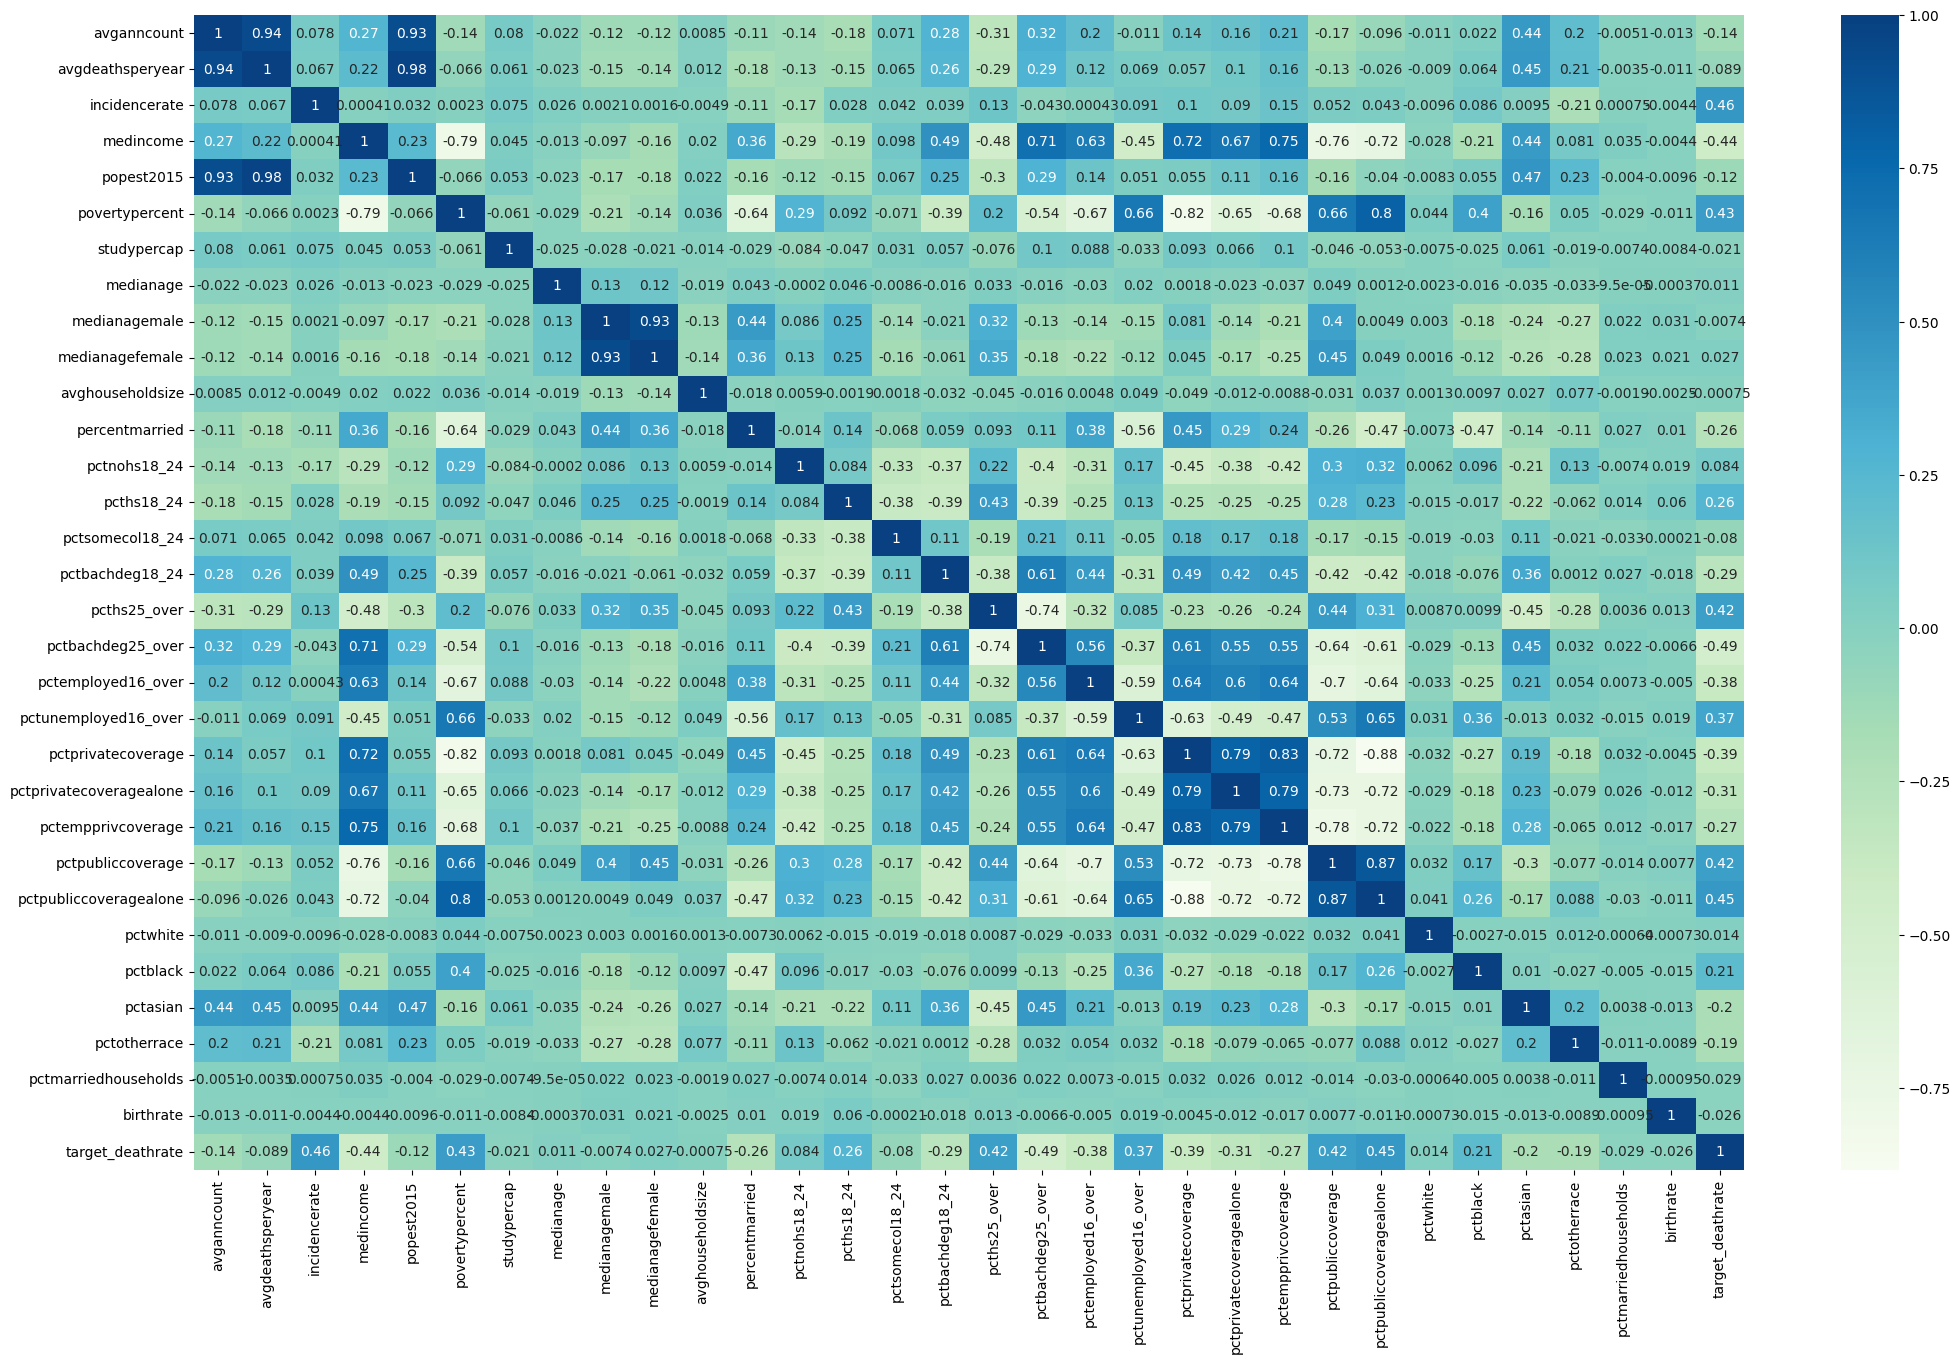

In [ ]:
correlation = cancer_to_train_df.corr()
fig, ax = plt.subplots(figsize=(25, 15))  # Set the figure size
sns.heatmap(correlation, cmap= "GnBu", annot = True)
plt.show()

/tmp/ipykernel_10411/1945710720.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(column, figsize=(5,5))


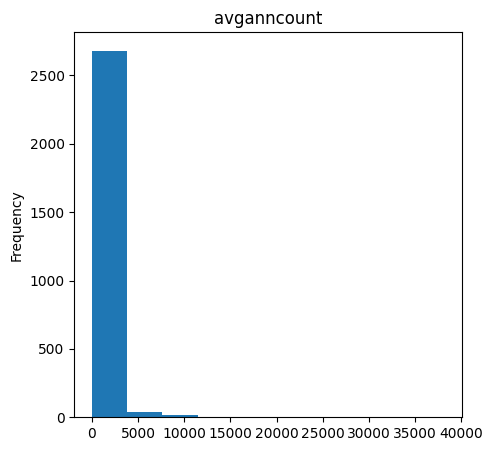

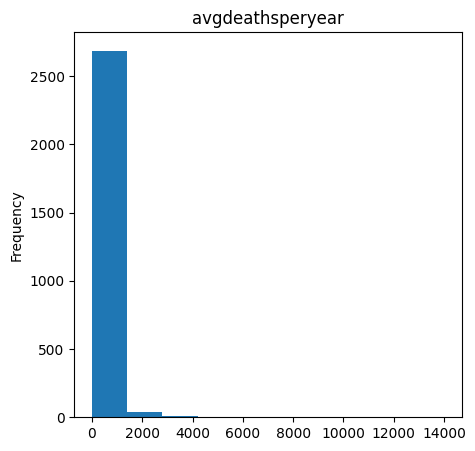

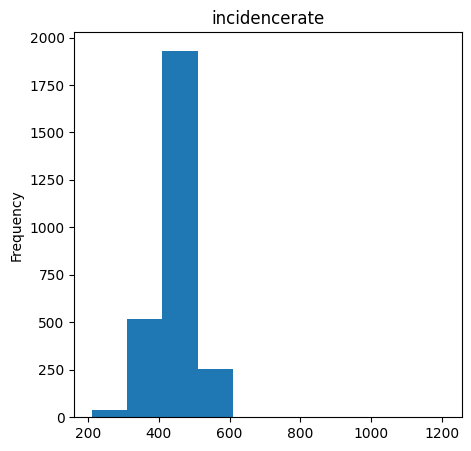

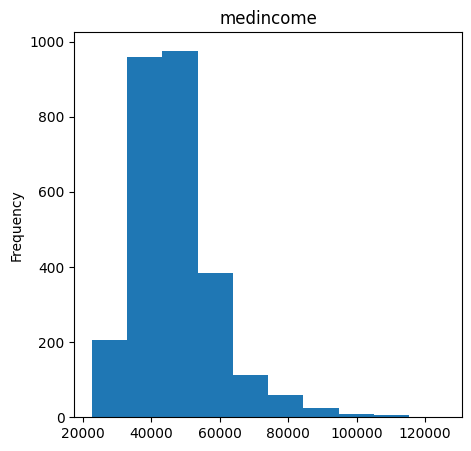

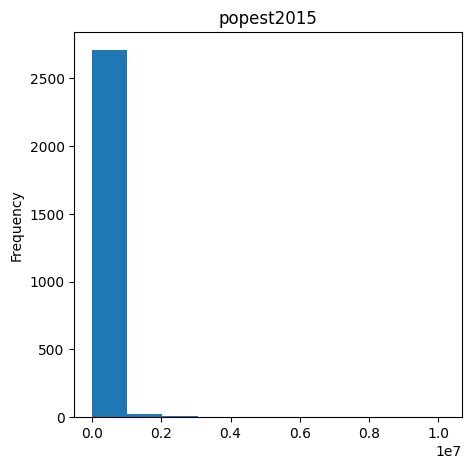

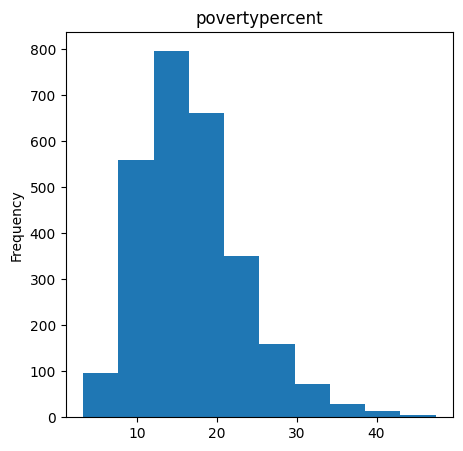

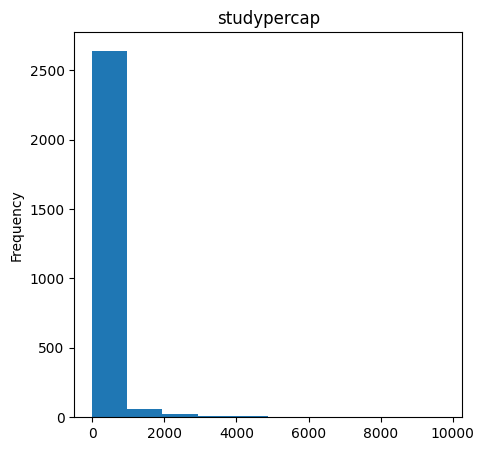

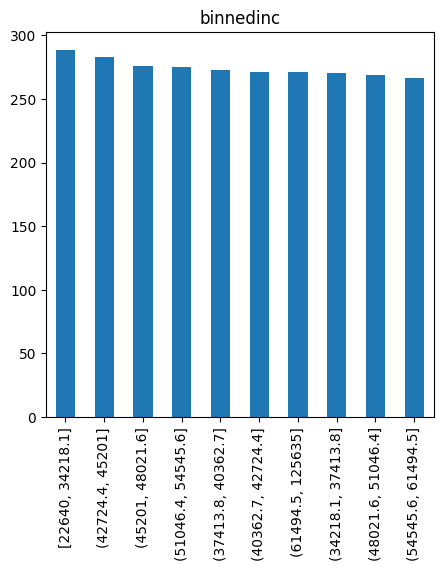

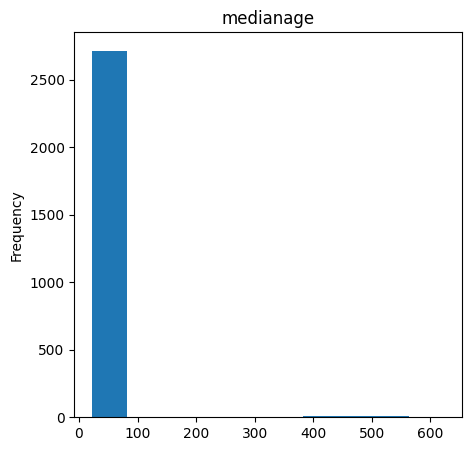

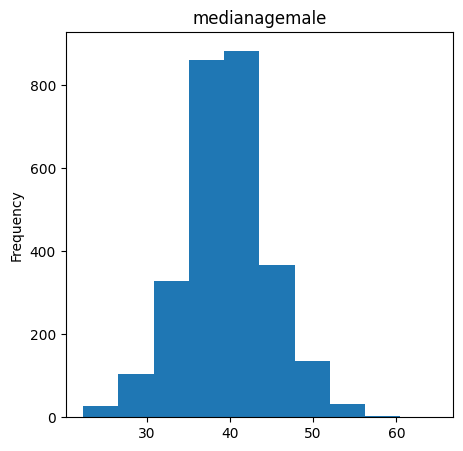

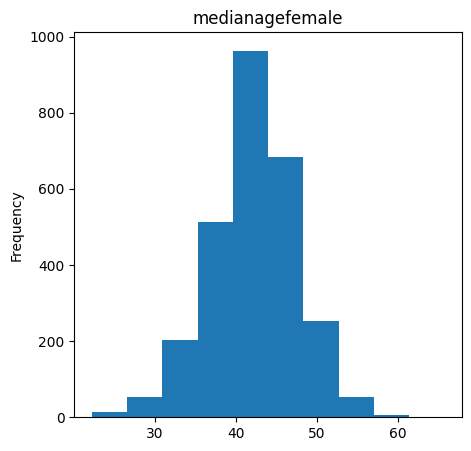

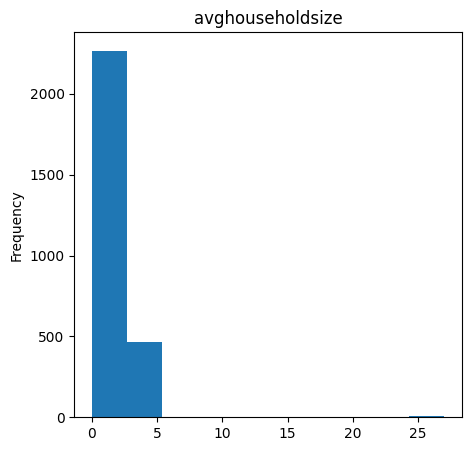

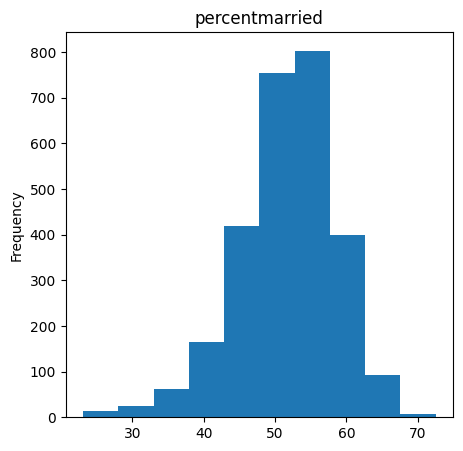

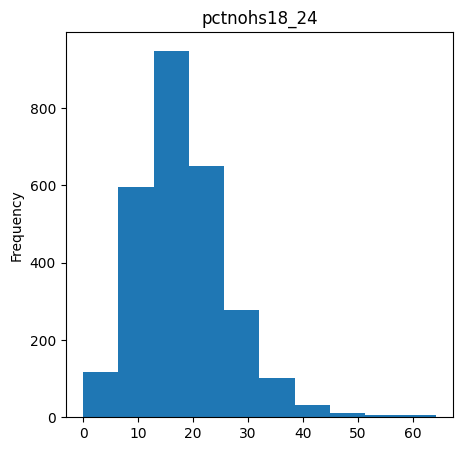

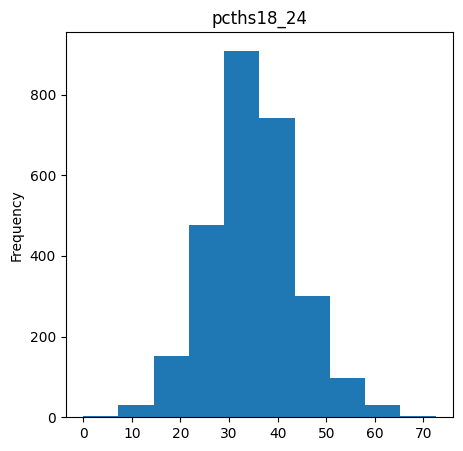

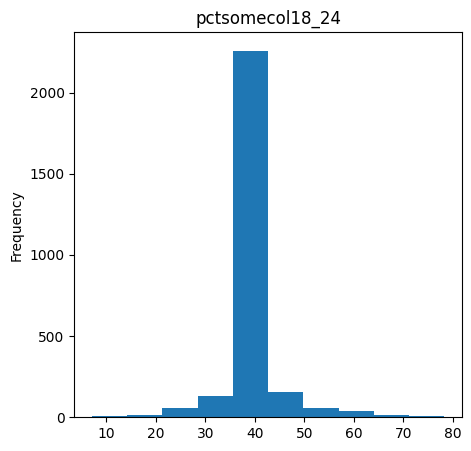

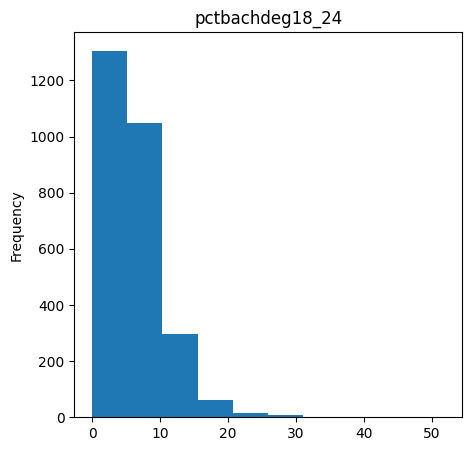

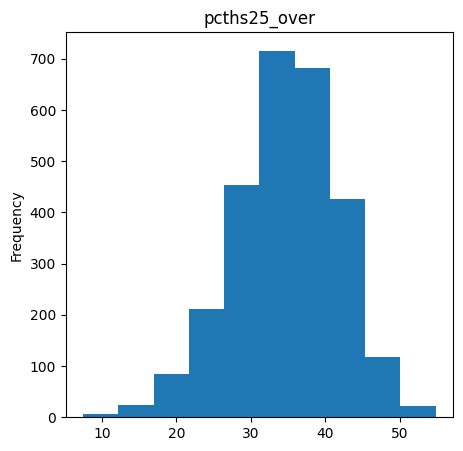

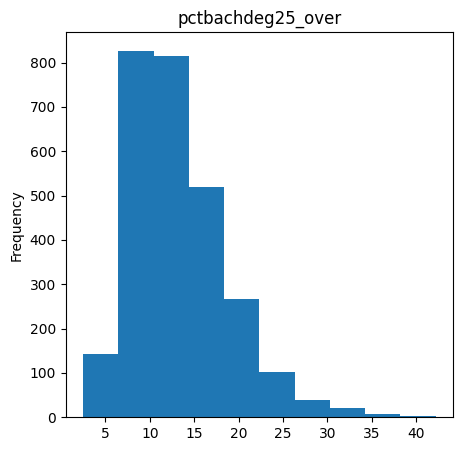

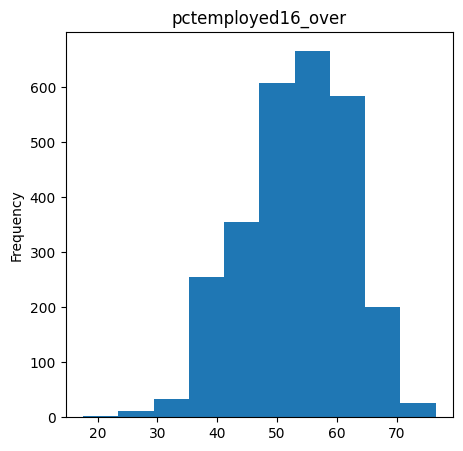

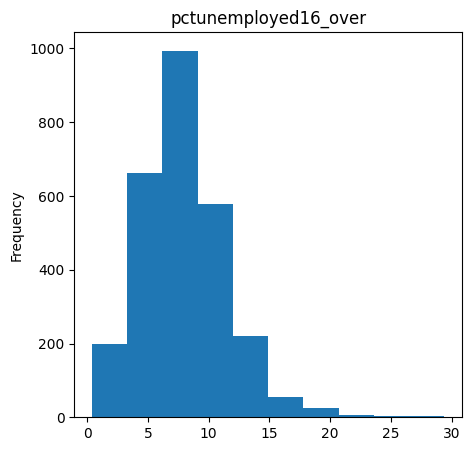

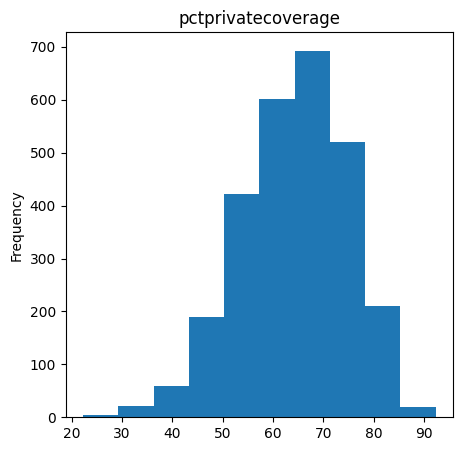

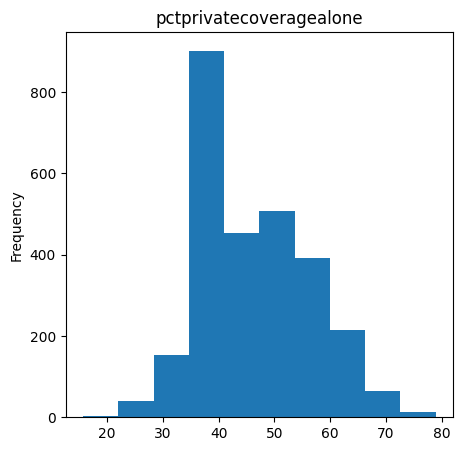

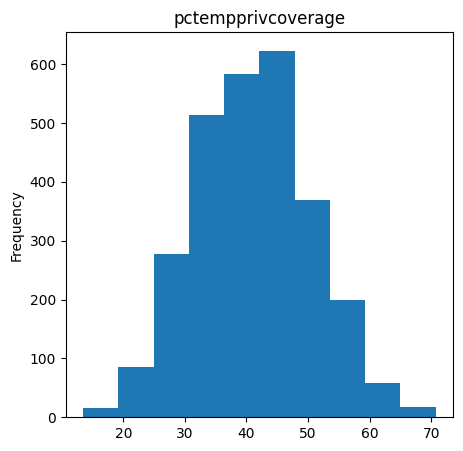

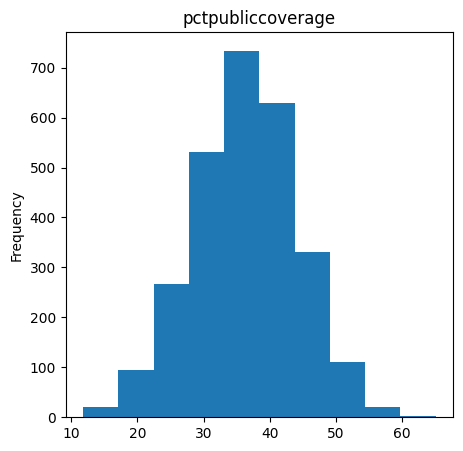

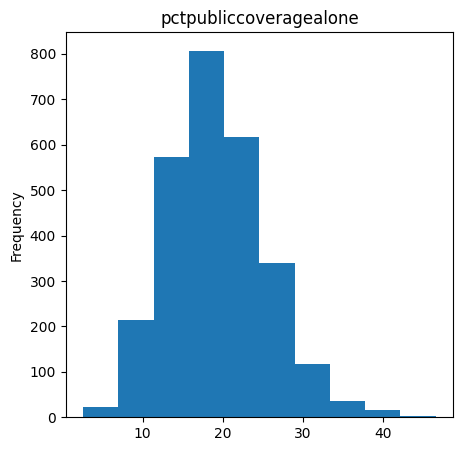

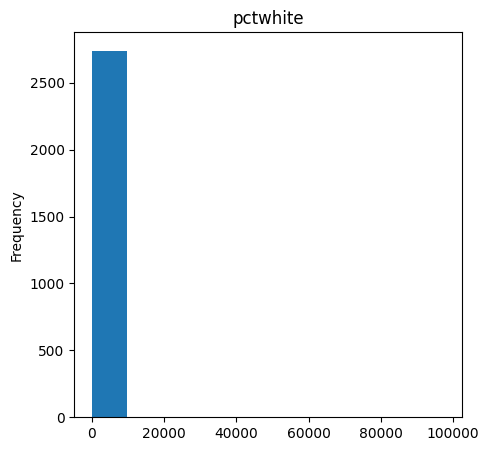

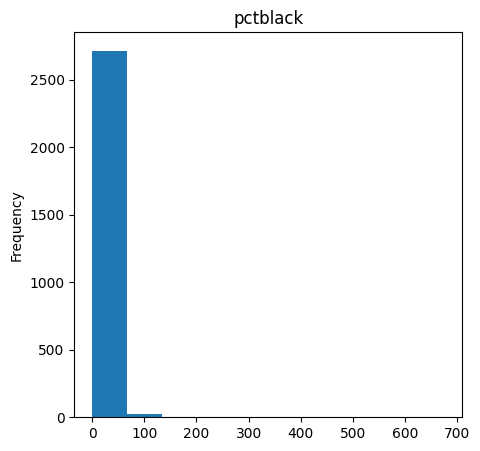

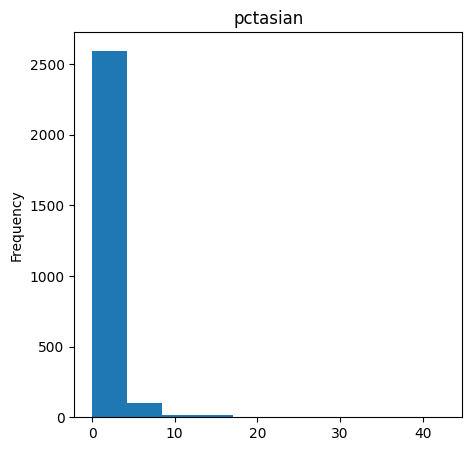

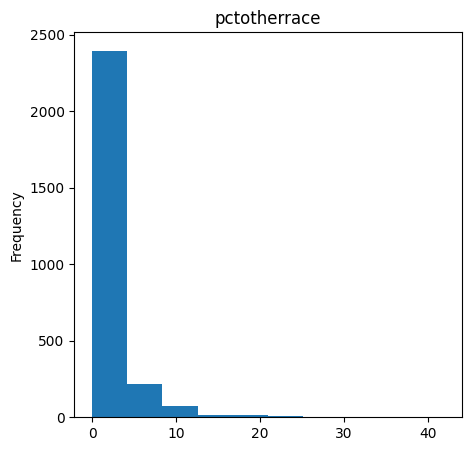

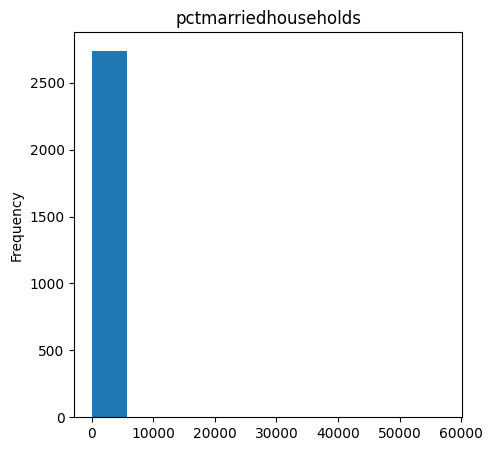

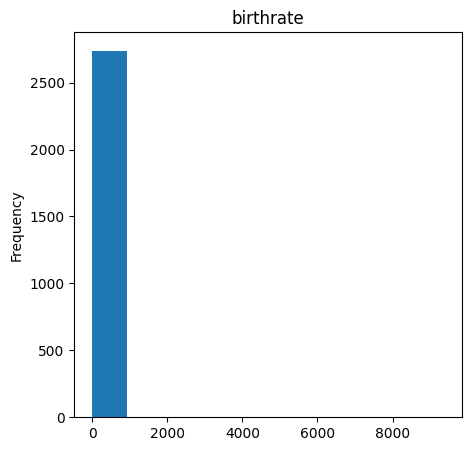

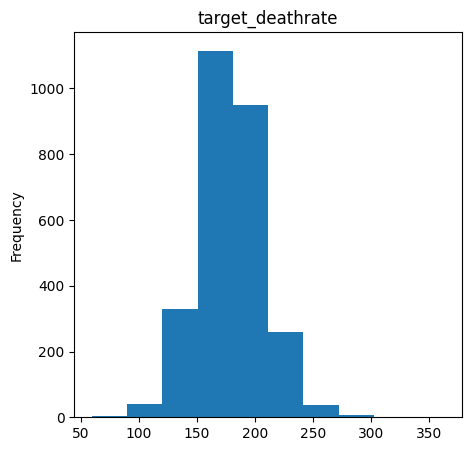

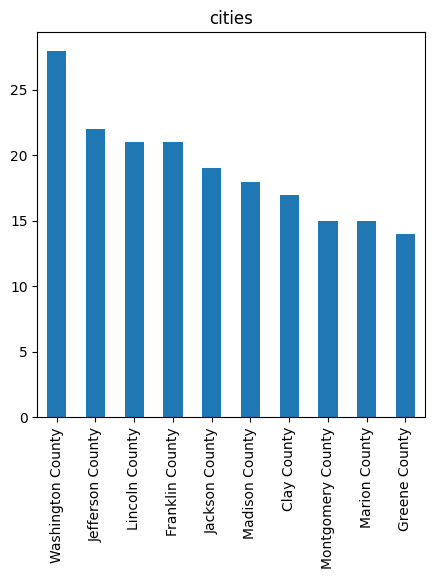

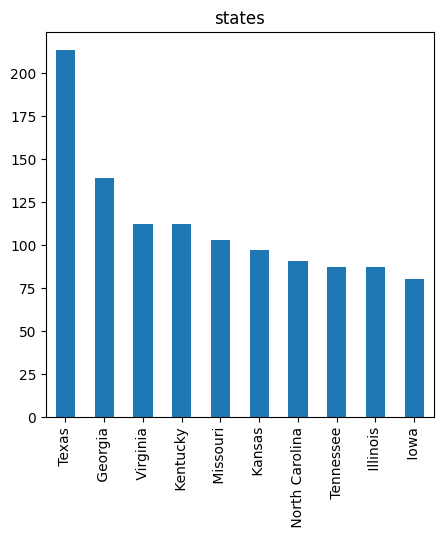

In [47]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
num_list = []
cat_list = []

for column in cancer_to_train_df:
    plt.figure(column, figsize=(5,5))
    plt.title(column)

    if is_numeric_dtype(cancer_to_train_df[column]):
        cancer_to_train_df[column].plot(kind='hist')
        num_list.append(column)
    if is_string_dtype(cancer_to_train_df[column]):
        cancer_to_train_df[column].value_counts()[:10].plot(kind = 'bar')
        cat_list.append(column)

In [48]:
for i in range(0, len(cat_list)):
    hue_cat = cat_list[i]
    sns.pairplot(cancer_to_train_df, hue=hue_cat)

: 

## Conclusões Atividade 1

Quais são as conclusões? (1-2 parágrafos)




*Coloque sua resposta aqui ...*

2. (2 pontos) Utilize 3 diferentes taxas de aprendizado de Gradiente Descendente (GD) ao otimizar. Compare as soluções baseadas em GD com a Equação Normal. Quais são as conclusões?


3. (3 pontos) Às vezes, precisamos de uma função mais complexa para fazer boas previsões. Elabore e avalie um modelo de Regressão Linear Polinomial.


## Conclusões Atividades 2 e 3

Quais são as conclusões? (1-2 parágrafos)


*Coloque sua resposta aqui ...*

## Resultados com o Conjunto de Dados de Teste


In [ ]:
# seu codigo

In [ ]:
# Linear Model with SDGRegressor


In [ ]:
# Polynomial model with SDGRegressor


## Prazo

Terça-feira, 01 de abril, às 23h59.

Política de penalização para envio atrasado: Não é encorajado o envio de sua tarefa após a data de vencimento. No entanto, caso você o faça, sua nota será penalizada da seguinte forma:

02 de abril, 23h59: nota * 0,75
03 de abril, 23h59: nota * 0,5
04 de abril, 23h59: nota * 0,25
Após: nota * 0


## Envio

Por e-mail adson.alves@facens.br, envie seu Notebook.

Esta atividade é individual.